# Step 1 Data cleaning

In [68]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df=pd.read_csv('Data for Cleaning & Modeling.csv')

/Users/jameswang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [94]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [95]:
# X2,X3 X19is the id, which is meanless to us
# X9 is the subgrade, which has the same meaning as X8
# X10 is the job title. However, the data is not catgory. There are too many type in this var.
# X15, X23 are date. We are not going to analyze that in this model.
# X16, X17,X18 are reasons 
# provided by borrower, which is too complicated and without integerate.
# X20 reprsent states, We won't do the anlayze of the area, so I drop it.
# I don't know what x32 means.
df=df.drop(columns=['X2','X3','X9','X10','X15','X16','X17','X18','X19','X20','X23','X32'])


In [96]:
# Since X1 is the variable we are going to predict, I choose rows that X1 has value to become 
# new data.
df=df[df['X1'].notnull()]

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338990 entries, 0 to 399999
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  object 
 1   X4      338989 non-null  object 
 2   X5      338989 non-null  object 
 3   X6      338989 non-null  object 
 4   X7      338989 non-null  object 
 5   X8      287123 non-null  object 
 6   X11     324195 non-null  object 
 7   X12     287030 non-null  object 
 8   X13     287238 non-null  float64
 9   X14     338989 non-null  object 
 10  X21     338989 non-null  float64
 11  X22     338989 non-null  float64
 12  X24     338989 non-null  float64
 13  X25     153533 non-null  float64
 14  X26     43400 non-null   float64
 15  X27     338989 non-null  float64
 16  X28     338989 non-null  float64
 17  X29     338989 non-null  float64
 18  X30     338765 non-null  object 
 19  X31     338989 non-null  float64
dtypes: float64(10), object(10)
memory usage: 54.3+ M

In [98]:
#deal with the data type

list_1 = ['X1','X30']
for a in list_1:
    df[a]=df[a].str.strip('%')
    df[a]=df[a].astype(float)
list_2 = ['X4','X5','X6']
for i in list_2:
    df[i]=df[i].str.strip('$')
    df[i]=df[i].str.replace(',','',regex=True)
    df[i]=df[i].astype(float)


In [99]:
# X7 only has two outcome change to 0 and 1
df['X7'].value_counts()

 36 months    247791
 60 months     91198
Name: X7, dtype: int64

In [100]:
df['X7']=df['X7'].apply(lambda x:0 if x ==' 36 months' else 1 )

In [101]:
#only want to know that the house is mortgage, own or not
df['is_mortgage']=df['X12'].apply(lambda x:1 if x =='MORTGAGE' else 0 )
df['is_own']=df['X12'].apply(lambda x:1 if x =='OWN' else 0 )

In [102]:
df=df.drop(columns=['X12'])

In [103]:
# X25,X26 missing too many data
df=df.drop(columns=['X25','X26'])

In [104]:
# row 344111 has missing most of the value
df[df['X4'].isnull()]

,X1,X4,X5,X6,X7,X8,X11,X13,X14,X21,X22,X24,X27,X28,X29,X30,X31,is_mortgage,is_own
364111,7.69,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [105]:
df=df.drop(364111, axis=0)

In [106]:
# In X14, turn not verified income into 0, else as 1
df['X14']=df['X14'].apply(lambda x:0 if x =='not verified' else 1 )

In [107]:
df['X13']=df['X13'].interpolate()

In [108]:
df['X30']=df['X30'].fillna(df['X13'].mean())

In [109]:
df['X8'].value_counts()

B    86121
C    76446
D    46984
A    45525
E    21628
F     8395
G     2024
Name: X8, dtype: int64

In [110]:
# turn abcd into 1234
df['X8']=df['X8'].apply(lambda x:1 if x =='A' else 
               (2 if x=='B' else (
               3 if x=='C' else (
               4 if x=='D' else(
               5 if x=='E' else(
               6 if x=='F' else(
               7 if x=='G' else None )))))) )

In [111]:
df['X8']=df['X8'].interpolate()

In [112]:
df['X11'].fillna(value=0,inplace=True)
df['X11'].replace(to_replace='[^0-9]+',value='',inplace=True,regex=True)
df['X11']=df['X11'].astype(int)

<AxesSubplot:>

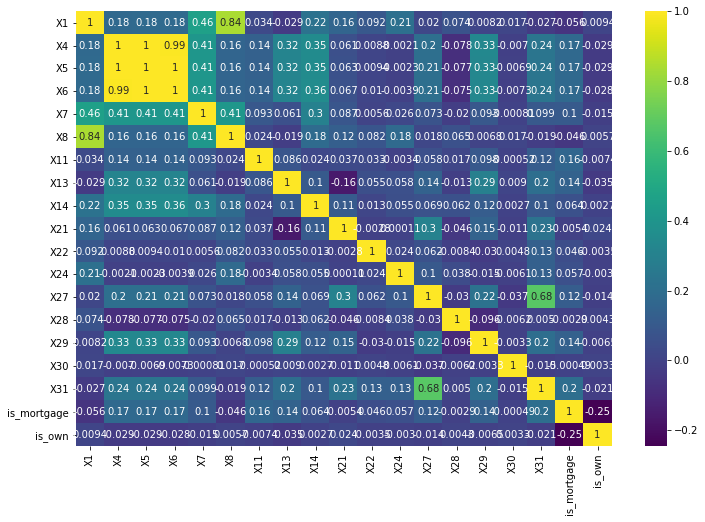

In [114]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

Since X4 X5 X6 X7 have high correlation to each others, we only pick X4 to build the model.
Also X27 X31 have high correlation, we pick X27.

In [115]:
df=df.drop(columns=['X5','X6','X7','X31'])

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338989 entries, 0 to 399999
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   X1           338989 non-null  float64
 1   X4           338989 non-null  float64
 2   X8           338989 non-null  float64
 3   X11          338989 non-null  int64  
 4   X13          338989 non-null  float64
 5   X14          338989 non-null  int64  
 6   X21          338989 non-null  float64
 7   X22          338989 non-null  float64
 8   X24          338989 non-null  float64
 9   X27          338989 non-null  float64
 10  X28          338989 non-null  float64
 11  X29          338989 non-null  float64
 12  X30          338989 non-null  float64
 13  is_mortgage  338989 non-null  int64  
 14  is_own       338989 non-null  int64  
dtypes: float64(11), int64(4)
memory usage: 41.4 MB


In [119]:
# split the data into train test sets
from sklearn.model_selection import train_test_split

In [122]:
x = df.drop(columns=['X1'])
y = df['X1']

In [123]:
train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8,
                                                    test_size=0.2,random_state=20)

# Step 2 build model

## Lasso

In [124]:
# import package
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [137]:
model_lasso = Lasso(alpha=0.05)
model_lasso.fit(train_x,train_y)
pred_y_lasso = model_lasso.predict(test_x)
mse = mean_squared_error(test_y,pred_y_lasso)
print('MSE:',round(mse,2))

MSE: 5.39


In [138]:
model_lasso.coef_

array([ 2.97877430e-05,  2.75339876e+00,  7.77230470e-03, -1.91860065e-06,
        2.60933824e-01,  3.14500877e-02,  7.11055003e-02,  2.41466572e-01,
       -1.96513270e-02,  0.00000000e+00, -3.46929796e-06,  7.71321714e-06,
       -4.23355336e-02,  0.00000000e+00])

## regression random forest

In [139]:
# import the package
from sklearn.ensemble import RandomForestRegressor

In [140]:
model_rf = RandomForestRegressor(n_estimators = 1000, random_state = 20)
model_rf.fit(train_x,train_y)
pred_y_rf = model_rf.predict(test_x)
mse = mean_squared_error(test_y,pred_y_rf)
print('MSE:',round(mse,2))

MSE: 4.09


# Step 3 make the prediction

In [145]:
df_hold=pd.read_csv('Holdout for testing.csv')

In [143]:
df_hold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      0 non-null      float64
 1   X2      80000 non-null  int64  
 2   X3      80000 non-null  int64  
 3   X4      80000 non-null  object 
 4   X5      80000 non-null  object 
 5   X6      80000 non-null  object 
 6   X7      80000 non-null  object 
 7   X8      80000 non-null  object 
 8   X9      80000 non-null  object 
 9   X10     75606 non-null  object 
 10  X11     75618 non-null  object 
 11  X12     80000 non-null  object 
 12  X13     80000 non-null  float64
 13  X14     80000 non-null  object 
 14  X15     80000 non-null  object 
 15  X16     15 non-null     object 
 16  X17     80000 non-null  object 
 17  X18     80000 non-null  object 
 18  X19     80000 non-null  object 
 19  X20     80000 non-null  object 
 20  X21     80000 non-null  float64
 21  X22     80000 non-null  int64  
 22

In [146]:
df_hold=df_hold.drop(columns=['X2','X3','X9','X10','X15','X16',
                              'X17','X18','X19','X20','X23',
                              'X32','X25','X26','X5','X6',
                              'X7','X31'])
list_1 = ['X30']
for a in list_1:
    df_hold[a]=df_hold[a].str.strip('%')
    df_hold[a]=df_hold[a].astype(float)
list_2 = ['X4']
for i in list_2:
    df_hold[i]=df_hold[i].str.strip('$')
    df_hold[i]=df_hold[i].str.replace(',','',regex=True)
    df_hold[i]=df_hold[i].astype(float)
    
df_hold['is_mortgage']=df_hold['X12'].apply(lambda x:1 if x =='MORTGAGE' else 0 )
df_hold['is_own']=df_hold['X12'].apply(lambda x:1 if x =='OWN' else 0 )
df_hold=df_hold.drop(columns=['X12'])
df_hold['X14']=df_hold['X14'].apply(lambda x:0 if x =='not verified' else 1 )
df_hold['X8']=df_hold['X8'].apply(lambda x:1 if x =='A' else 
               (2 if x=='B' else (
               3 if x=='C' else (
               4 if x=='D' else(
               5 if x=='E' else(
               6 if x=='F' else(
               7 if x=='G' else None )))))) )
df_hold['X11'].fillna(value=0,inplace=True)
df_hold['X11'].replace(to_replace='[^0-9]+',value='',inplace=True,regex=True)
df_hold['X11']=df_hold['X11'].astype(int)

In [147]:
df_hold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X1           0 non-null      float64
 1   X4           80000 non-null  float64
 2   X8           80000 non-null  int64  
 3   X11          80000 non-null  int64  
 4   X13          80000 non-null  float64
 5   X14          80000 non-null  int64  
 6   X21          80000 non-null  float64
 7   X22          80000 non-null  int64  
 8   X24          80000 non-null  int64  
 9   X27          80000 non-null  int64  
 10  X28          80000 non-null  int64  
 11  X29          80000 non-null  int64  
 12  X30          79970 non-null  float64
 13  is_mortgage  80000 non-null  int64  
 14  is_own       80000 non-null  int64  
dtypes: float64(5), int64(10)
memory usage: 9.2 MB


In [148]:
df_hold['X30']=df_hold['X30'].interpolate()

In [149]:
df_hold=df_hold.drop(columns=['X1'])

In [151]:
pred_holdout = model_rf.predict(df_hold)

In [152]:
pred_result=pd.DataFrame({
    'X1':pred_holdout,})

In [155]:
pred_result.to_csv('Results from ccwang4.csv',index=False)